Import Libraries

In [ ]:
import re
import numpy as np
import pandas as pd

###TF-IDF

##### Raw-Term Frequency

In [ ]:
data = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
data

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
data = data.rename(columns = {"jointekslemma": "review"})

In [ ]:
data = data.loc[:,['review']]
data

,review
0,mohon maaf mangapa shopee lebih susah buka con...
1,sekarang banyak akun toko tipu
2,sangat puas barang datang sesuai layan puas
3,sangat bantu mepermudah belanja mohon tingkat ...
4,fitur cari tidak akurat makin banyak bug beber...
...,...
1395,customer service nya layan respons baik
1396,aplikasi shopee parah beli barang tidak sesuai...
1397,masuk buat shopee customer minta kembali dana ...
1398,mohon baik update baru tidak bisa transaksi un...


In [ ]:
def Tokenize(data):
  data['review_token'] = ""
  data['review'] = data['review'].astype('str')
  for i in range(len(data)):
    data['review_token'][i] = data['review'][i].lower().split()
  all_tokenize = sorted(list(set([item for sublist in data['review_token'] for item in sublist])))
  return data, all_tokenize

In [ ]:
def raw_term_frequency(data, all_tokenize):
  from operator import truediv
  token_cal = Tokenize(data)
  data_tokenize = token_cal[0]
  print(data_tokenize)
  for item in all_tokenize:
    data_tokenize[item] = 0
  for item in all_tokenize:
    for i in range(len(data_tokenize)):
      if data_tokenize['review_token'][i].count(item) > 0:
        a = data_tokenize['review_token'][i].count(item)
        data_tokenize[item] = data_tokenize[item].astype('float')
        data_tokenize[item][i] = a
  return data_tokenize

In [ ]:
raw_term = raw_term_frequency(data, Tokenize(data)[1])

                                                 review  \
0     mohon maaf mangapa shopee lebih susah buka con...   
1                        sekarang banyak akun toko tipu   
2           sangat puas barang datang sesuai layan puas   
3     sangat bantu mepermudah belanja mohon tingkat ...   
4     fitur cari tidak akurat makin banyak bug beber...   
...                                                 ...   
1395            customer service nya layan respons baik   
1396  aplikasi shopee parah beli barang tidak sesuai...   
1397  masuk buat shopee customer minta kembali dana ...   
1398  mohon baik update baru tidak bisa transaksi un...   
1399  lama kirim banyak masalah beda sama aplikasi b...   

                                           review_token  
0     [mohon, maaf, mangapa, shopee, lebih, susah, b...  
1                  [sekarang, banyak, akun, toko, tipu]  
2     [sangat, puas, barang, datang, sesuai, layan, ...  
3     [sangat, bantu, mepermudah, belanja, mohon, ti...  
4

<ipython-input-6-daeeb30dd0ee>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-6-daeeb30dd0ee>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-6-daeeb30dd0ee>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize

In [ ]:
raw_term = raw_term.drop(columns=['review', 'review_token'], axis=1)

In [ ]:
raw_term

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_term.to_csv('raw_term_frequency.csv',index=False)

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
raw_term_frequency = pd.read_csv('raw_term_frequency.csv')
raw_term_frequency

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_term_frequency['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
raw_term_frequency

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


####Aspect Classification Raw Term Frequency

In [ ]:
aspek = dataShopee.loc[:,['aspek']]

In [ ]:
aspek

,aspek
0,Efficiency
1,Privacy
2,Fulfillment
3,Efficiency
4,System Availability
...,...
1395,Responsiveness
1396,Responsiveness
1397,Compensation
1398,System Availability


In [ ]:
aspek['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(aspek["aspek"]))]

In [ ]:
aspek

,aspek,Dokumen
0,Efficiency,Dokumen1
1,Privacy,Dokumen2
2,Fulfillment,Dokumen3
3,Efficiency,Dokumen4
4,System Availability,Dokumen5
...,...,...
1395,Responsiveness,Dokumen1396
1396,Responsiveness,Dokumen1397
1397,Compensation,Dokumen1398
1398,System Availability,Dokumen1399


In [ ]:
raw_term_frequency_shopee_aspek = raw_term_frequency.merge(aspek, on='Dokumen')
raw_term_frequency_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,aspek_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,System Availability


In [ ]:
raw_term_frequency_shopee_aspek.drop('Dokumen', axis=1, inplace=True)

In [ ]:
raw_term_frequency_shopee_aspek = raw_term_frequency_shopee_aspek.rename(columns = {"aspek_y": "aspek"})

In [ ]:
raw_term_frequency_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_aspek,data_uji_aspek = train_test_split(raw_term_frequency_shopee_aspek, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_aspek.shape[0])
print(data_latih_aspek.shape[0])

280
1120


In [ ]:
data_uji_aspek['aspek'].value_counts()

Fulfillment            46
System Availability    43
Privacy                43
Compensation           39
Contact                39
Efficiency             37
Responsiveness         33
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek['aspek'].value_counts()

Efficiency             180
Fulfillment            168
Responsiveness         163
Compensation           158
System Availability    151
Contact                151
Privacy                149
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
1317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
752,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
543,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
data_uji_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
1011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy


In [ ]:
label_uji_aspek = data_uji_aspek.pop('aspek')

In [ ]:
label_uji_aspek

870              Efficiency
487             Fulfillment
179             Fulfillment
897     System Availability
339            Compensation
               ...         
483                 Contact
87      System Availability
486                 Contact
1011                Privacy
45              Fulfillment
Name: aspek, Length: 280, dtype: object

In [ ]:
def buat_trainingset_aspek(dataset_aspek):
  trainingset_aspek = {}
  kolom_kelas_aspek = dataset_aspek.columns[-1]
  list_kelas_aspek = dataset_aspek[kolom_kelas_aspek].unique()
  for kelas_aspek in list_kelas_aspek:
    data_temp_aspek = dataset_aspek.copy(deep=True)
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].map({kelas_aspek:1})
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].fillna(-1)
    trainingset_aspek[kelas_aspek]=data_temp_aspek
  return trainingset_aspek

In [ ]:
trainingset_aspek = buat_trainingset_aspek(data_latih_aspek)

In [ ]:
print(trainingset_aspek)

{'Privacy':       abad  abai  abal  acara  aceh  ada  adakan  adek  adil  admin  ...  \
206    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
833    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
475    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
715    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
212    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
...    ...   ...   ...    ...   ...  ...     ...   ...   ...    ...  ...   
1048   0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
1317   0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
752    0.0   0.0   0.0    0.0   0.0  2.0     0.0   0.0   0.0    0.0  ...   
543    0.0   0.0   0.0    0.0   0.0  2.0     0.0   0.0   0.0    0.0  ...   
1043   0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   

      waswas  wenang  whatsapp  wifi  wilayah   xl  yakin  youtube  zakat  

In [ ]:
def hinge_loss_function_aspek(W_aspek,X_aspek,Y_aspek,regularization_aspek):
  jarak_aspek = 1 - (Y_aspek* np.dot(X_aspek,W_aspek))
  dw_aspek = np.zeros(len(W_aspek)) ##mengisi semua nilai dengan 0
  if max(0,jarak_aspek)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_aspek=W_aspek
  else:
    di_aspek = W_aspek - (regularization_aspek * Y_aspek*X_aspek)
  dw_aspek += di_aspek
  return dw_aspek

In [ ]:
from sklearn.utils import shuffle
def sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek, max_epoch_aspek,regularization_aspek):
  learning_rate_aspek = learning_rate_aspek
  max_epoch_aspek = max_epoch_aspek
  regularization_aspek = regularization_aspek
  data_latih_aspek = data_latih_aspek.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_aspek = label_latih_aspek.to_numpy()
  bobot_aspek = np.zeros(data_latih_aspek.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_aspek in range(1,max_epoch_aspek+1):
    X_aspek,Y_aspek = shuffle(data_latih_aspek,label_latih_aspek,random_state=101)
    for index_aspek,x_aspek in enumerate(X_aspek):
      delta_aspek = hinge_loss_function_aspek(bobot_aspek,x_aspek,Y_aspek[index_aspek],regularization_aspek) #perhitungan nilai gradient cost function
      bobot_aspek = bobot_aspek - (learning_rate_aspek * delta_aspek)
  return bobot_aspek

In [ ]:
learning_rate_aspek = 0.00001
max_epoch_aspek=100
regularization_aspek = 10000

In [ ]:
def training_aspek(trainingset_aspek):
  list_kelas_aspek = trainingset_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari trainingset
  w_aspek = {}
  for kelas_aspek in list_kelas_aspek:
    data_latih_aspek = trainingset_aspek[kelas_aspek]
    label_latih_aspek = data_latih_aspek.pop(data_latih_aspek.columns[-1]) ##diambil kolom terakhir
    w_aspek[kelas_aspek] = sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek,max_epoch_aspek,regularization_aspek)
  return w_aspek

In [ ]:
W_aspek = training_aspek(trainingset_aspek)

In [ ]:
print(W_aspek)

{'Privacy': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.03272386]), 'Responsiveness': array([ 0.        ,  0.        ,  0.        , ...,  0.10059115,
        0.        , -0.16647485]), 'Fulfillment': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.03281365,  0.        ]), 'System Availability': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.29639152,  0.03272386]), 'Contact': array([ 0.        ,  0.        ,  0.        , ..., -0.07422409,
        0.        ,  0.        ]), 'Efficiency': array([0.        , 0.        , 0.        , ..., 0.        , 0.56854015,
       0.        ]), 'Compensation': array([ 0.        ,  0.        ,  0.        , ..., -0.03415406,
       -0.03266044,  0.        ])}


In [ ]:
def testing_aspek(W_aspek,data_uji_aspek):
  prediksi_aspek = np.array([])
  for i in range(data_uji_aspek.shape[0]): ##data_uji_aspek.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_aspek = np.sign(np.dot(W_aspek,data_uji_aspek.to_numpy()[i]))
    prediksi_aspek = np.append(prediksi_aspek,y_prediksi_aspek) ##Tambahkan nilai ke akhir array.
  return prediksi_aspek

In [ ]:
def testing_onevsrest_aspek(W_aspek,data_uji_aspek):
  list_kelas_aspek = W_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari w/bobot
  hasil_aspek = pd.DataFrame(columns=W_aspek.keys())
  for kelas_aspek in list_kelas_aspek:
    hasil_aspek[kelas_aspek] = testing_aspek(W_aspek[kelas_aspek],data_uji_aspek)
  kelas_prediksi_aspek = hasil_aspek.idxmax(1) ##Mengembalikan nama kolom yang memiliki nilai terbesar pada setiap baris
  return kelas_prediksi_aspek

In [ ]:
prediksi_aspek = testing_onevsrest_aspek(W_aspek,data_uji_aspek)

In [ ]:
print(prediksi_aspek)

0                  Privacy
1              Fulfillment
2              Fulfillment
3      System Availability
4                  Privacy
              ...         
275            Fulfillment
276             Efficiency
277                Contact
278                Privacy
279                Privacy
Length: 280, dtype: object


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_aspek, prediksi_aspek))

                     precision    recall  f1-score   support

       Compensation       0.94      0.74      0.83        39
            Contact       0.97      0.85      0.90        39
         Efficiency       0.87      0.73      0.79        37
        Fulfillment       0.81      0.83      0.82        46
            Privacy       0.65      0.98      0.78        43
     Responsiveness       0.89      0.94      0.91        33
System Availability       0.92      0.79      0.85        43

           accuracy                           0.84       280
          macro avg       0.86      0.84      0.84       280
       weighted avg       0.86      0.84      0.84       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label_uji_aspek, prediksi_aspek)

In [ ]:
matrix

array([[29,  1,  0,  2,  5,  1,  1],
       [ 0, 33,  0,  3,  2,  1,  0],
       [ 0,  0, 27,  3,  5,  0,  2],
       [ 1,  0,  0, 38,  6,  1,  0],
       [ 0,  0,  1,  0, 42,  0,  0],
       [ 1,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  3,  1,  4,  1, 34]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

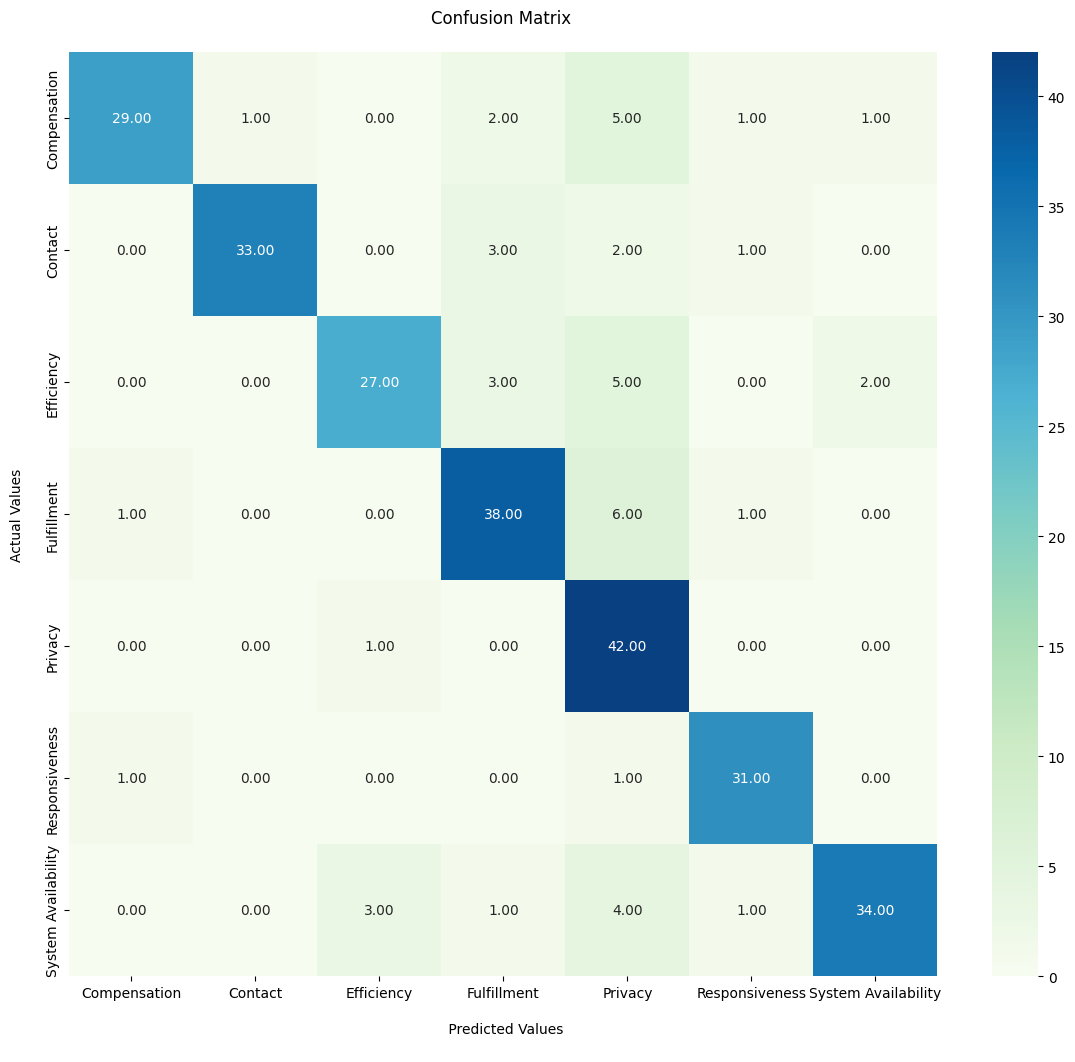

In [ ]:
plt.figure(figsize=(14,12))
fx=sns.heatmap(confusion_matrix(label_uji_aspek, prediksi_aspek), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Compensation','Contact','Efficiency','Fulfillment','Privacy','Responsiveness','System Availability'])
fx.yaxis.set_ticklabels(['Compensation','Contact','Efficiency','Fulfillment','Privacy','Responsiveness','System Availability'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_aspek, prediksi_aspek))

0.8357142857142857


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8405064927723924


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8623339338974666


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8360565822648736


#####Sentiment Classification Raw Term Frequency

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
raw_term_frequency = pd.read_csv('raw_term_frequency.csv')
raw_term_frequency

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_term_frequency['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
raw_term_frequency

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


In [ ]:
sentimen = dataShopee.loc[:,['sentimen']]

In [ ]:
sentimen

,sentimen
0,negatif
1,negatif
2,positif
3,positif
4,negatif
...,...
1395,positif
1396,negatif
1397,negatif
1398,negatif


In [ ]:
raw_term_frequency_sentimen = raw_term_frequency.join(sentimen)

In [ ]:
raw_term_frequency_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,negatif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,negatif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,positif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,positif
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,negatif
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,negatif
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,negatif


In [ ]:
raw_term_frequency_sentimen['sentimen'] = raw_term_frequency_sentimen['sentimen'].map({'negatif':-1,'positif':1})

In [ ]:
raw_term_frequency_sentimen.drop('Dokumen', axis=1, inplace=True)

In [ ]:
raw_term_frequency_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_sentimen,data_uji_sentimen = train_test_split(raw_term_frequency_sentimen, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_sentimen.shape[0])
print(data_latih_sentimen.shape[0])

280
1120


In [ ]:
data_latih_sentimen['sentimen'].value_counts()

 1    562
-1    558
Name: sentimen, dtype: int64

In [ ]:
data_uji_sentimen['sentimen'].value_counts()

-1    144
 1    136
Name: sentimen, dtype: int64

In [ ]:
label_latih_sentimen = data_latih_sentimen.pop('sentimen')

In [ ]:
label_uji_sentimen = data_uji_sentimen.pop('sentimen')

In [ ]:
def hinge_loss_function_sentimen(W_sentimen,X_sentimen,Y_sentimen,regularization_sentimen):
  jarak_sentimen = 1 - (Y_sentimen* np.dot(X_sentimen,W_sentimen))
  dw_sentimen = np.zeros(len(W_sentimen)) ##mengisi semua nilai dengan 0
  if max(0,jarak_sentimen)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_sentimen=W_sentimen
  else:
    di_sentimen = W_sentimen - (regularization_sentimen * Y_sentimen*X_sentimen)
  dw_sentimen += di_sentimen
  return dw_sentimen

In [ ]:
from sklearn.utils import shuffle
def sgd_sentimen(data_latih_sentimen, label_latih_sentimen, learning_rate_sentimen = 0.0001, max_epoch_sentimen=10, regularization_sentimen=1000):
  data_latih_sentimen = data_latih_sentimen.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_sentimen = label_latih_sentimen.to_numpy()
  bobot_sentimen = np.zeros(data_latih_sentimen.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_sentimen in range(1,max_epoch_sentimen+1):
    X_sentimen,Y_sentimen = shuffle(data_latih_sentimen,label_latih_sentimen,random_state=101)
    for index_sentimen,x_sentimen in enumerate(X_sentimen):
      delta_sentimen = hinge_loss_function_sentimen(bobot_sentimen,x_sentimen,Y_sentimen[index_sentimen],regularization_sentimen) #perhitungan nilai gradient cost function
      bobot_sentimen = bobot_sentimen - (learning_rate_sentimen * delta_sentimen)
  return bobot_sentimen

In [ ]:
W_sentimen = sgd_sentimen(data_latih_sentimen, label_latih_sentimen)
print(W_sentimen)

[ 0.         -0.13560029  0.         ...  0.23227115 -0.24634715
  0.        ]


In [ ]:
def testing_sentimen(W_sentimen,data_uji_sentimen):
  prediksi_sentimen = np.array([])
  for i in range(data_uji_sentimen.shape[0]): ##data_uji.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_sentimen = np.sign(np.dot(W_sentimen,data_uji_sentimen.to_numpy()[i]))
    if y_prediksi_sentimen == 1 :
      print("positif")
    else :
      print("negatif")
    prediksi_sentimen = np.append(prediksi_sentimen,y_prediksi_sentimen) ##Tambahkan nilai ke akhir array.
  return prediksi_sentimen

In [ ]:
y_prediksi_sentimen = testing_sentimen(W_sentimen, data_uji_sentimen)

negatif
negatif
negatif
positif
negatif
positif
positif
negatif
negatif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
positif
negatif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
negatif
positif
negatif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
negatif
positif
positif
negatif
positif
positif
positif
negatif
positif
positif
negatif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
negatif
negatif
positif
negatif
positif
positif
negatif
positif
negatif
negatif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
positif
positif
negatif
negatif
negatif
negatif
positif
positif
negatif
positif
positif


In [ ]:
print(y_prediksi_sentimen)

[-1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.
 -1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_sentimen, y_prediksi_sentimen))

              precision    recall  f1-score   support

          -1       0.90      0.93      0.91       144
           1       0.92      0.89      0.91       136

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix_sentimen = confusion_matrix(label_uji_sentimen, y_prediksi_sentimen)

In [ ]:
matrix_sentimen

array([[134,  10],
       [ 15, 121]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

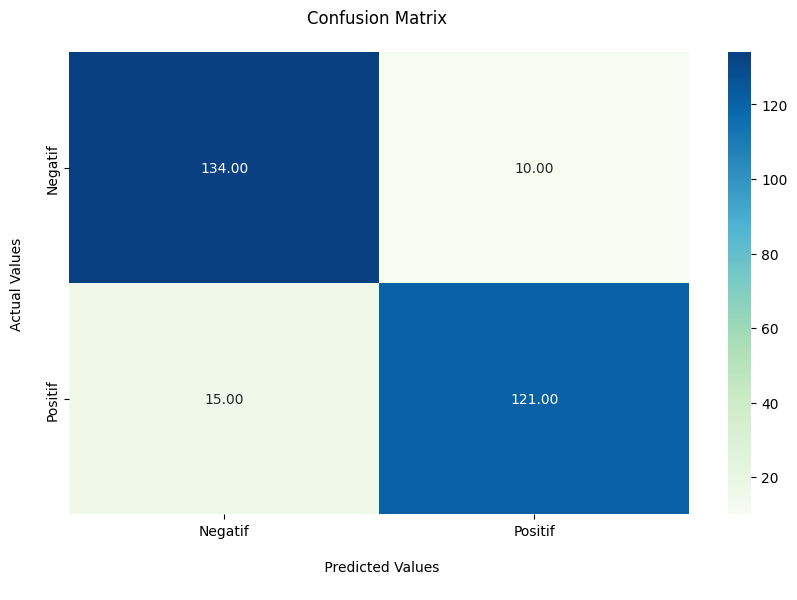

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(label_uji_sentimen, y_prediksi_sentimen), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negatif','Positif'])
fx.yaxis.set_ticklabels(['Negatif','Positif'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_sentimen, y_prediksi_sentimen))

0.9107142857142857


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_sentimen, y_prediksi_sentimen))

0.9063670411985019


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_sentimen, y_prediksi_sentimen))

0.9236641221374046


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_sentimen, y_prediksi_sentimen))

0.8897058823529411


Log Term

Import Libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import math

In [ ]:
data = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
data

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
data = data.rename(columns = {"jointekslemma": "review"})

In [ ]:
data = data.loc[:,['review']]
data

,review
0,mohon maaf mangapa shopee lebih susah buka con...
1,sekarang banyak akun toko tipu
2,sangat puas barang datang sesuai layan puas
3,sangat bantu mepermudah belanja mohon tingkat ...
4,fitur cari tidak akurat makin banyak bug beber...
...,...
1395,customer service nya layan respons baik
1396,aplikasi shopee parah beli barang tidak sesuai...
1397,masuk buat shopee customer minta kembali dana ...
1398,mohon baik update baru tidak bisa transaksi un...


In [ ]:
def Tokenize(data):
  data['review_token'] = ""
  data['review'] = data['review'].astype('str')
  for i in range(len(data)):
    data['review_token'][i] = data['review'][i].lower().split()
  all_tokenize = sorted(list(set([item for sublist in data['review_token'] for item in sublist])))
  return data, all_tokenize

In [ ]:
def log_frequency_weighting(data, all_tokenize):
  from operator import truediv
  token_cal = Tokenize(data)
  data_tokenize = token_cal[0]
  print(data_tokenize)
  for item in all_tokenize:
    data_tokenize[item] = 0
  for item in all_tokenize:
    for i in range(len(data_tokenize)):
      if data_tokenize['review_token'][i].count(item) > 0:
        a = data_tokenize['review_token'][i].count(item)
        b = 1 + (math.log10(a))
        data_tokenize[item] = data_tokenize[item].astype('float')
        data_tokenize[item][i] = b
  return data_tokenize

In [ ]:
log_frequency_weighting = log_frequency_weighting(data, Tokenize(data)[1])

                                                 review  \
0     mohon maaf mangapa shopee lebih susah buka con...   
1                        sekarang banyak akun toko tipu   
2           sangat puas barang datang sesuai layan puas   
3     sangat bantu mepermudah belanja mohon tingkat ...   
4     fitur cari tidak akurat makin banyak bug beber...   
...                                                 ...   
1395            customer service nya layan respons baik   
1396  aplikasi shopee parah beli barang tidak sesuai...   
1397  masuk buat shopee customer minta kembali dana ...   
1398  mohon baik update baru tidak bisa transaksi un...   
1399  lama kirim banyak masalah beda sama aplikasi b...   

                                           review_token  
0     [mohon, maaf, mangapa, shopee, lebih, susah, b...  
1                  [sekarang, banyak, akun, toko, tipu]  
2     [sangat, puas, barang, datang, sesuai, layan, ...  
3     [sangat, bantu, mepermudah, belanja, mohon, ti...  
4

<ipython-input-6-8032ae4ac397>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-6-8032ae4ac397>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-6-8032ae4ac397>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize

In [ ]:
log_frequency_weighting = log_frequency_weighting.drop(columns=['review', 'review_token'], axis=1)

In [ ]:
log_frequency_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_frequency_weighting.to_csv('log_frequency_weighting_shopee.csv',index=False)

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
log_frequency_weighting = pd.read_csv('log_frequency_weighting_shopee.csv')
log_frequency_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_frequency_weighting['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
log_frequency_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


####Aspect Classification Log Frequency Weighting

In [ ]:
aspek = dataShopee.loc[:,['aspek']]

In [ ]:
aspek

,aspek
0,Efficiency
1,Privacy
2,Fulfillment
3,Efficiency
4,System Availability
...,...
1395,Responsiveness
1396,Responsiveness
1397,Compensation
1398,System Availability


In [ ]:
aspek['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(aspek["aspek"]))]

In [ ]:
aspek

,aspek,Dokumen
0,Efficiency,Dokumen1
1,Privacy,Dokumen2
2,Fulfillment,Dokumen3
3,Efficiency,Dokumen4
4,System Availability,Dokumen5
...,...,...
1395,Responsiveness,Dokumen1396
1396,Responsiveness,Dokumen1397
1397,Compensation,Dokumen1398
1398,System Availability,Dokumen1399


In [ ]:
log_frequency_weighting_shopee_aspek = log_frequency_weighting.merge(aspek, on='Dokumen')
log_frequency_weighting_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,aspek_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,System Availability


In [ ]:
log_frequency_weighting_shopee_aspek.drop('Dokumen', axis=1, inplace=True)

In [ ]:
log_frequency_weighting_shopee_aspek = log_frequency_weighting_shopee_aspek.rename(columns = {"aspek_y": "aspek"})

In [ ]:
log_frequency_weighting_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_aspek,data_uji_aspek = train_test_split(log_frequency_weighting_shopee_aspek, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_aspek.shape[0])
print(data_latih_aspek.shape[0])

280
1120


In [ ]:
data_uji_aspek['aspek'].value_counts()

Fulfillment            46
System Availability    43
Privacy                43
Compensation           39
Contact                39
Efficiency             37
Responsiveness         33
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek['aspek'].value_counts()

Efficiency             180
Fulfillment            168
Responsiveness         163
Compensation           158
System Availability    151
Contact                151
Privacy                149
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
206,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
833,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
475,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
715,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
212,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
1317,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
752,0.0,0.0,0.0,0.0,0.0,1.30103,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
543,0.0,0.0,0.0,0.0,0.0,1.30103,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
data_uji_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
1011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy


In [ ]:
label_uji_aspek = data_uji_aspek.pop('aspek')

In [ ]:
label_uji_aspek

870              Efficiency
487             Fulfillment
179             Fulfillment
897     System Availability
339            Compensation
               ...         
483                 Contact
87      System Availability
486                 Contact
1011                Privacy
45              Fulfillment
Name: aspek, Length: 280, dtype: object

In [ ]:
def buat_trainingset_aspek(dataset_aspek):
  trainingset_aspek = {}
  kolom_kelas_aspek = dataset_aspek.columns[-1]
  list_kelas_aspek = dataset_aspek[kolom_kelas_aspek].unique()
  for kelas_aspek in list_kelas_aspek:
    data_temp_aspek = dataset_aspek.copy(deep=True)
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].map({kelas_aspek:1})
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].fillna(-1)
    trainingset_aspek[kelas_aspek]=data_temp_aspek
  return trainingset_aspek

In [ ]:
trainingset_aspek = buat_trainingset_aspek(data_latih_aspek)

In [ ]:
print(trainingset_aspek)

{'Privacy':       abad  abai  abal  acara  aceh      ada  adakan  adek  adil  admin  ...  \
206    0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
833    0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
475    0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
715    0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
212    0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
...    ...   ...   ...    ...   ...      ...     ...   ...   ...    ...  ...   
1048   0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
1317   0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   
752    0.0   0.0   0.0    0.0   0.0  1.30103     0.0   0.0   0.0    0.0  ...   
543    0.0   0.0   0.0    0.0   0.0  1.30103     0.0   0.0   0.0    0.0  ...   
1043   0.0   0.0   0.0    0.0   0.0  0.00000     0.0   0.0   0.0    0.0  ...   

      waswas  wenang  whats

In [ ]:
def hinge_loss_function_aspek(W_aspek,X_aspek,Y_aspek,regularization_aspek):
  jarak_aspek = 1 - (Y_aspek* np.dot(X_aspek,W_aspek))
  dw_aspek = np.zeros(len(W_aspek)) ##mengisi semua nilai dengan 0
  if max(0,jarak_aspek)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_aspek=W_aspek
  else:
    di_aspek = W_aspek - (regularization_aspek * Y_aspek*X_aspek)
  dw_aspek += di_aspek
  return dw_aspek

In [ ]:
from sklearn.utils import shuffle
def sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek, max_epoch_aspek,regularization_aspek):
  learning_rate_aspek = learning_rate_aspek
  max_epoch_aspek = max_epoch_aspek
  regularization_aspek = regularization_aspek
  data_latih_aspek = data_latih_aspek.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_aspek = label_latih_aspek.to_numpy()
  bobot_aspek = np.zeros(data_latih_aspek.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_aspek in range(1,max_epoch_aspek+1):
    X_aspek,Y_aspek = shuffle(data_latih_aspek,label_latih_aspek,random_state=101)
    for index_aspek,x_aspek in enumerate(X_aspek):
      delta_aspek = hinge_loss_function_aspek(bobot_aspek,x_aspek,Y_aspek[index_aspek],regularization_aspek) #perhitungan nilai gradient cost function
      bobot_aspek = bobot_aspek - (learning_rate_aspek * delta_aspek)
  return bobot_aspek

In [ ]:
learning_rate_aspek = 0.00001
max_epoch_aspek=100
regularization_aspek = 10000

In [ ]:
def training_aspek(trainingset_aspek):
  list_kelas_aspek = trainingset_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari trainingset
  w_aspek = {}
  for kelas_aspek in list_kelas_aspek:
    data_latih_aspek = trainingset_aspek[kelas_aspek]
    label_latih_aspek = data_latih_aspek.pop(data_latih_aspek.columns[-1]) ##diambil kolom terakhir
    w_aspek[kelas_aspek] = sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek,max_epoch_aspek,regularization_aspek)
  return w_aspek

In [ ]:
W_aspek = training_aspek(trainingset_aspek)

In [ ]:
print(W_aspek)

{'Privacy': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.03272386]), 'Responsiveness': array([ 0.        ,  0.        ,  0.        , ...,  0.17993123,
       -0.03266044, -0.18104087]), 'Fulfillment': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.03281365,  0.        ]), 'System Availability': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.16788237,  0.        ]), 'Contact': array([0., 0., 0., ..., 0., 0., 0.]), 'Efficiency': array([0.        , 0.        , 0.        , ..., 0.        , 0.46188841,
       0.        ]), 'Compensation': array([0.03279954, 0.        , 0.        , ..., 0.17039077, 0.        ,
       0.        ])}


In [ ]:
def testing_aspek(W_aspek,data_uji_aspek):
  prediksi_aspek = np.array([])
  for i in range(data_uji_aspek.shape[0]): ##data_uji_aspek.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_aspek = np.sign(np.dot(W_aspek,data_uji_aspek.to_numpy()[i]))
    prediksi_aspek = np.append(prediksi_aspek,y_prediksi_aspek) ##Tambahkan nilai ke akhir array.
  return prediksi_aspek

In [ ]:
def testing_onevsrest_aspek(W_aspek,data_uji_aspek):
  list_kelas_aspek = W_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari w/bobot
  hasil_aspek = pd.DataFrame(columns=W_aspek.keys())
  for kelas_aspek in list_kelas_aspek:
    hasil_aspek[kelas_aspek] = testing_aspek(W_aspek[kelas_aspek],data_uji_aspek)
  kelas_prediksi_aspek = hasil_aspek.idxmax(1) ##Mengembalikan nama kolom yang memiliki nilai terbesar pada setiap baris
  return kelas_prediksi_aspek

In [ ]:
prediksi_aspek = testing_onevsrest_aspek(W_aspek,data_uji_aspek)

In [ ]:
print(prediksi_aspek)

0                  Privacy
1              Fulfillment
2              Fulfillment
3      System Availability
4             Compensation
              ...         
275                Contact
276             Efficiency
277                Contact
278                Privacy
279                Privacy
Length: 280, dtype: object


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_aspek, prediksi_aspek))

                     precision    recall  f1-score   support

       Compensation       0.93      0.72      0.81        39
            Contact       0.94      0.87      0.91        39
         Efficiency       0.94      0.78      0.85        37
        Fulfillment       0.82      0.80      0.81        46
            Privacy       0.66      0.98      0.79        43
     Responsiveness       0.89      0.94      0.91        33
System Availability       0.90      0.81      0.85        43

           accuracy                           0.84       280
          macro avg       0.87      0.84      0.85       280
       weighted avg       0.86      0.84      0.84       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label_uji_aspek, prediksi_aspek)

In [ ]:
matrix

array([[28,  2,  0,  2,  5,  1,  1],
       [ 0, 34,  0,  3,  0,  2,  0],
       [ 0,  0, 29,  2,  3,  0,  3],
       [ 1,  0,  0, 37,  8,  0,  0],
       [ 0,  0,  0,  1, 42,  0,  0],
       [ 1,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  2,  0,  5,  1, 35]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

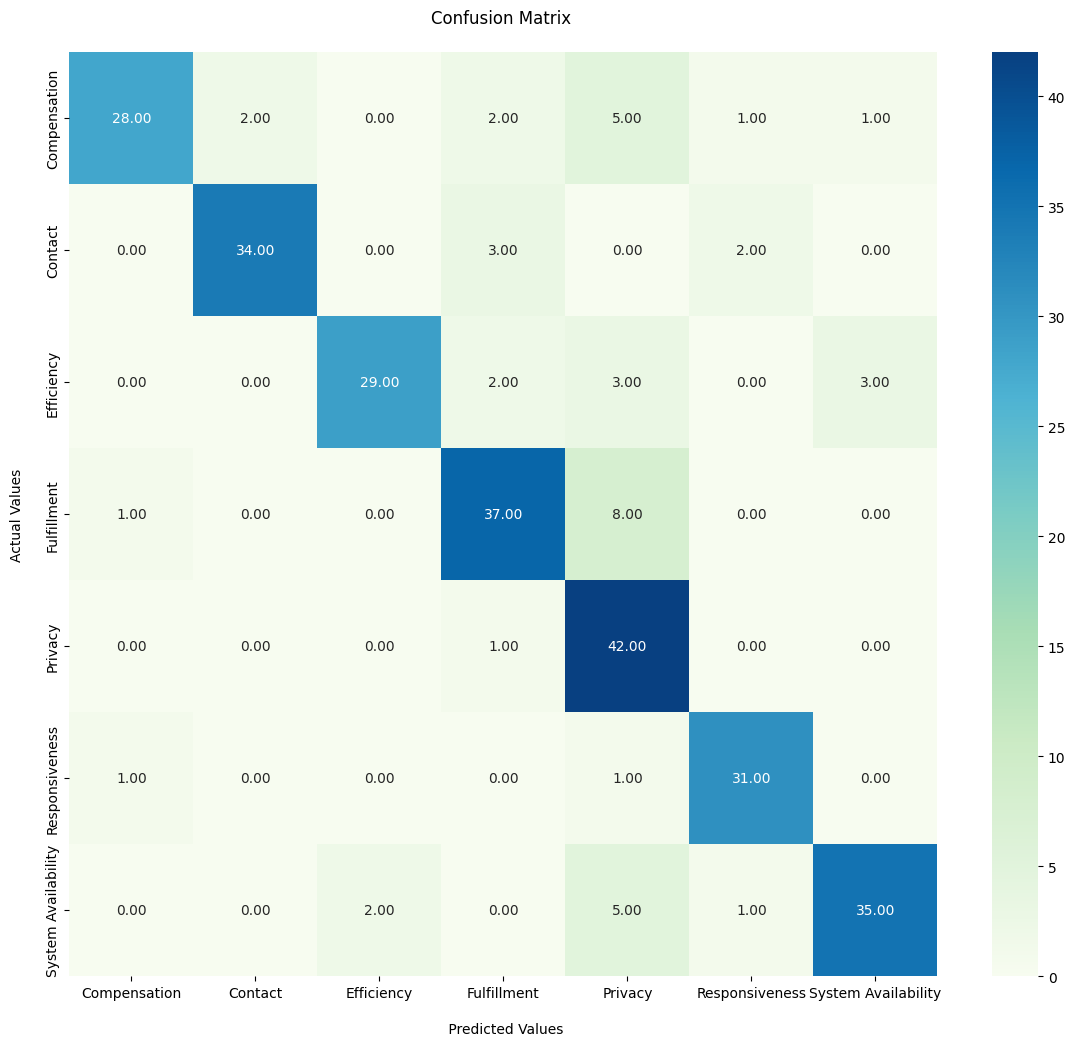

In [ ]:
plt.figure(figsize=(14,12))
fx=sns.heatmap(confusion_matrix(label_uji_aspek, prediksi_aspek), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Compensation','Contact','Efficiency','Fulfillment','Privacy','Responsiveness','System Availability'])
fx.yaxis.set_ticklabels(['Compensation','Contact','Efficiency','Fulfillment','Privacy','Responsiveness','System Availability'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_aspek, prediksi_aspek))

0.8428571428571429


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8478369758089


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8678405791597036


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.843995259060982


#####Sentiment Classification Log Frequency Weighting

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
log_frequency_weighting= pd.read_csv('log_frequency_weighting_shopee.csv')
log_frequency_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_frequency_weighting['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
log_frequency_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


In [ ]:
sentimen = dataShopee.loc[:,['sentimen']]

In [ ]:
sentimen

,sentimen
0,negatif
1,negatif
2,positif
3,positif
4,negatif
...,...
1395,positif
1396,negatif
1397,negatif
1398,negatif


In [ ]:
log_frequency_weighting_sentimen = log_frequency_weighting.join(sentimen)

In [ ]:
log_frequency_weighting_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,negatif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,negatif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,positif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,positif
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,negatif
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,negatif
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,negatif


In [ ]:
log_frequency_weighting_sentimen['sentimen'] = log_frequency_weighting_sentimen['sentimen'].map({'negatif':-1,'positif':1})

In [ ]:
log_frequency_weighting_sentimen.drop('Dokumen', axis=1, inplace=True)

In [ ]:
log_frequency_weighting_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_sentimen,data_uji_sentimen = train_test_split(log_frequency_weighting_sentimen, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_sentimen.shape[0])
print(data_latih_sentimen.shape[0])

280
1120


In [ ]:
data_latih_sentimen['sentimen'].value_counts()

 1    562
-1    558
Name: sentimen, dtype: int64

In [ ]:
data_uji_sentimen['sentimen'].value_counts()

-1    144
 1    136
Name: sentimen, dtype: int64

In [ ]:
label_latih_sentimen = data_latih_sentimen.pop('sentimen')

In [ ]:
label_uji_sentimen = data_uji_sentimen.pop('sentimen')

In [ ]:
def hinge_loss_function_sentimen(W_sentimen,X_sentimen,Y_sentimen,regularization_sentimen):
  jarak_sentimen = 1 - (Y_sentimen* np.dot(X_sentimen,W_sentimen))
  dw_sentimen = np.zeros(len(W_sentimen)) ##mengisi semua nilai dengan 0
  if max(0,jarak_sentimen)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_sentimen=W_sentimen
  else:
    di_sentimen = W_sentimen - (regularization_sentimen * Y_sentimen*X_sentimen)
  dw_sentimen += di_sentimen
  return dw_sentimen

In [ ]:
from sklearn.utils import shuffle
def sgd_sentimen(data_latih_sentimen, label_latih_sentimen, learning_rate_sentimen = 0.0001, max_epoch_sentimen=10, regularization_sentimen=1000):
  data_latih_sentimen = data_latih_sentimen.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_sentimen = label_latih_sentimen.to_numpy()
  bobot_sentimen = np.zeros(data_latih_sentimen.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_sentimen in range(1,max_epoch_sentimen+1):
    X_sentimen,Y_sentimen = shuffle(data_latih_sentimen,label_latih_sentimen,random_state=101)
    for index_sentimen,x_sentimen in enumerate(X_sentimen):
      delta_sentimen = hinge_loss_function_sentimen(bobot_sentimen,x_sentimen,Y_sentimen[index_sentimen],regularization_sentimen) #perhitungan nilai gradient cost function
      bobot_sentimen = bobot_sentimen - (learning_rate_sentimen * delta_sentimen)
  return bobot_sentimen

In [ ]:
W_sentimen = sgd_sentimen(data_latih_sentimen, label_latih_sentimen)
print(W_sentimen)

[ 0.         -0.20842601  0.         ...  0.11960123 -0.25045392
  0.        ]


In [ ]:
def testing_sentimen(W_sentimen,data_uji_sentimen):
  prediksi_sentimen = np.array([])
  for i in range(data_uji_sentimen.shape[0]): ##data_uji.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_sentimen = np.sign(np.dot(W_sentimen,data_uji_sentimen.to_numpy()[i]))
    if y_prediksi_sentimen == 1 :
      print("positif")
    else :
      print("negatif")
    prediksi_sentimen = np.append(prediksi_sentimen,y_prediksi_sentimen) ##Tambahkan nilai ke akhir array.
  return prediksi_sentimen

In [ ]:
y_prediksi_sentimen = testing_sentimen(W_sentimen, data_uji_sentimen)

negatif
negatif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
positif
positif
negatif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
positif
positif
negatif
negatif
positif
positif
negatif
positif
negatif
positif
negatif
positif
positif
negatif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
negatif
negatif
positif
negatif
positif
positif
negatif
positif
negatif
negatif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
positif
positif
negatif
negatif
negatif
negatif
positif
positif
negatif
positif
positif


In [ ]:
print(y_prediksi_sentimen)

[-1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.
 -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_sentimen, y_prediksi_sentimen))

              precision    recall  f1-score   support

          -1       0.91      0.94      0.93       144
           1       0.94      0.90      0.92       136

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix_sentimen = confusion_matrix(label_uji_sentimen, y_prediksi_sentimen)

In [ ]:
matrix_sentimen

array([[136,   8],
       [ 14, 122]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

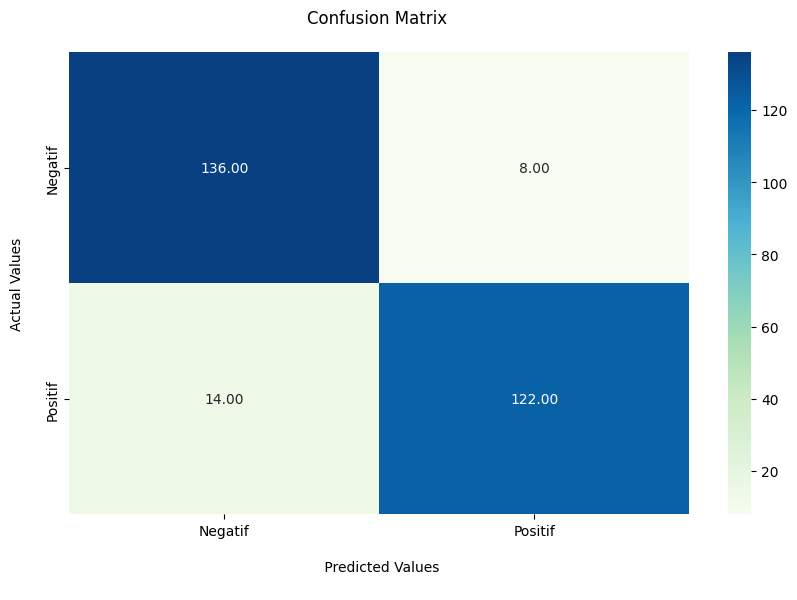

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(label_uji_sentimen, y_prediksi_sentimen), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negatif','Positif'])
fx.yaxis.set_ticklabels(['Negatif','Positif'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_sentimen, y_prediksi_sentimen))

0.9214285714285714


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_sentimen, y_prediksi_sentimen))

0.9172932330827067


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_sentimen, y_prediksi_sentimen))

0.9384615384615385


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_sentimen, y_prediksi_sentimen))

0.8970588235294118


Binary Term Weighting

Import Libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import math

In [ ]:
data = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
data

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
data = data.rename(columns = {"jointekslemma": "review"})

In [ ]:
data = data.loc[:,['review']]
data

,review
0,mohon maaf mangapa shopee lebih susah buka con...
1,sekarang banyak akun toko tipu
2,sangat puas barang datang sesuai layan puas
3,sangat bantu mepermudah belanja mohon tingkat ...
4,fitur cari tidak akurat makin banyak bug beber...
...,...
1395,customer service nya layan respons baik
1396,aplikasi shopee parah beli barang tidak sesuai...
1397,masuk buat shopee customer minta kembali dana ...
1398,mohon baik update baru tidak bisa transaksi un...


In [ ]:
def Tokenize(data):
  data['review_token'] = ""
  data['review'] = data['review'].astype('str')
  for i in range(len(data)):
    data['review_token'][i] = data['review'][i].lower().split()
  all_tokenize = sorted(list(set([item for sublist in data['review_token'] for item in sublist])))
  return data, all_tokenize

In [ ]:
def binary_term_weighting(data, all_tokenize):
  from operator import truediv
  token_cal = Tokenize(data)
  data_tokenize = token_cal[0]
  print(data_tokenize)
  for item in all_tokenize:
    data_tokenize[item] = 0
  for item in all_tokenize:
    for i in range(len(data_tokenize)):
      if data_tokenize['review_token'][i].count(item) > 0:
        a = 1
        data_tokenize[item] = data_tokenize[item].astype('float')
        data_tokenize[item][i] = a
  return data_tokenize

In [ ]:
binary_term_weighting = binary_term_weighting(data, Tokenize(data)[1])

                                                 review  \
0     mohon maaf mangapa shopee lebih susah buka con...   
1                        sekarang banyak akun toko tipu   
2           sangat puas barang datang sesuai layan puas   
3     sangat bantu mepermudah belanja mohon tingkat ...   
4     fitur cari tidak akurat makin banyak bug beber...   
...                                                 ...   
1395            customer service nya layan respons baik   
1396  aplikasi shopee parah beli barang tidak sesuai...   
1397  masuk buat shopee customer minta kembali dana ...   
1398  mohon baik update baru tidak bisa transaksi un...   
1399  lama kirim banyak masalah beda sama aplikasi b...   

                                           review_token  
0     [mohon, maaf, mangapa, shopee, lebih, susah, b...  
1                  [sekarang, banyak, akun, toko, tipu]  
2     [sangat, puas, barang, datang, sesuai, layan, ...  
3     [sangat, bantu, mepermudah, belanja, mohon, ti...  
4

<ipython-input-98-aa790147051b>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-98-aa790147051b>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_tokenize[item] = 0
<ipython-input-98-aa790147051b>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_token

In [ ]:
binary_term_weighting = binary_term_weighting.drop(columns=['review', 'review_token'], axis=1)

In [ ]:
binary_term_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
binary_term_weighting.to_csv('binary_term_weighting.csv',index=False)

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

,jointekslemma,aspek,sentimen
0,mohon maaf mangapa shopee lebih susah buka con...,Efficiency,negatif
1,sekarang banyak akun toko tipu,Privacy,negatif
2,sangat puas barang datang sesuai layan puas,Fulfillment,positif
3,sangat bantu mepermudah belanja mohon tingkat ...,Efficiency,positif
4,fitur cari tidak akurat makin banyak bug beber...,System Availability,negatif
...,...,...,...
1395,customer service nya layan respons baik,Responsiveness,positif
1396,aplikasi shopee parah beli barang tidak sesuai...,Responsiveness,negatif
1397,masuk buat shopee customer minta kembali dana ...,Compensation,negatif
1398,mohon baik update baru tidak bisa transaksi un...,System Availability,negatif


In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
binary_term_weighting = pd.read_csv('binary_term_weighting.csv')
binary_term_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
binary_term_weighting['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
binary_term_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399


####Aspect Classification Binary Term Weighting

In [ ]:
aspek = dataShopee.loc[:,['aspek']]

In [ ]:
aspek

,aspek
0,Efficiency
1,Privacy
2,Fulfillment
3,Efficiency
4,System Availability
...,...
1395,Responsiveness
1396,Responsiveness
1397,Compensation
1398,System Availability


In [ ]:
aspek['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(aspek["aspek"]))]

In [ ]:
aspek

,aspek,Dokumen
0,Efficiency,Dokumen1
1,Privacy,Dokumen2
2,Fulfillment,Dokumen3
3,Efficiency,Dokumen4
4,System Availability,Dokumen5
...,...,...
1395,Responsiveness,Dokumen1396
1396,Responsiveness,Dokumen1397
1397,Compensation,Dokumen1398
1398,System Availability,Dokumen1399


In [ ]:
binary_term_weighting_shopee_aspek = binary_term_weighting.merge(aspek, on='Dokumen')
binary_term_weighting_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,aspek_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,System Availability


In [ ]:
binary_term_weighting_shopee_aspek.drop('Dokumen', axis=1, inplace=True)

In [ ]:
binary_term_weighting_shopee_aspek = binary_term_weighting_shopee_aspek.rename(columns = {"aspek_y": "aspek"})

In [ ]:
binary_term_weighting_shopee_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_aspek,data_uji_aspek = train_test_split(binary_term_weighting_shopee_aspek, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_aspek.shape[0])
print(data_latih_aspek.shape[0])

280
1120


In [ ]:
data_uji_aspek['aspek'].value_counts()

Fulfillment            46
System Availability    43
Privacy                43
Compensation           39
Contact                39
Efficiency             37
Responsiveness         33
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek['aspek'].value_counts()

Efficiency             180
Fulfillment            168
Responsiveness         163
Compensation           158
System Availability    151
Contact                151
Privacy                149
Name: aspek, dtype: int64

In [ ]:
data_latih_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy
475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Responsiveness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
1317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
543,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability


In [ ]:
data_uji_aspek

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,aspek
870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Efficiency
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fulfillment
897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Compensation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,System Availability
486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Contact
1011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privacy


In [ ]:
label_uji_aspek = data_uji_aspek.pop('aspek')

In [ ]:
label_uji_aspek

870              Efficiency
487             Fulfillment
179             Fulfillment
897     System Availability
339            Compensation
               ...         
483                 Contact
87      System Availability
486                 Contact
1011                Privacy
45              Fulfillment
Name: aspek, Length: 280, dtype: object

In [ ]:
def buat_trainingset_aspek(dataset_aspek):
  trainingset_aspek = {}
  kolom_kelas_aspek = dataset_aspek.columns[-1]
  list_kelas_aspek = dataset_aspek[kolom_kelas_aspek].unique()
  for kelas_aspek in list_kelas_aspek:
    data_temp_aspek = dataset_aspek.copy(deep=True)
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].map({kelas_aspek:1})
    data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].fillna(-1)
    trainingset_aspek[kelas_aspek]=data_temp_aspek
  return trainingset_aspek

In [ ]:
trainingset_aspek = buat_trainingset_aspek(data_latih_aspek)

In [ ]:
print(trainingset_aspek)

{'Privacy':       abad  abai  abal  acara  aceh  ada  adakan  adek  adil  admin  ...  \
206    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
833    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
475    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
715    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
212    0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
...    ...   ...   ...    ...   ...  ...     ...   ...   ...    ...  ...   
1048   0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
1317   0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   
752    0.0   0.0   0.0    0.0   0.0  1.0     0.0   0.0   0.0    0.0  ...   
543    0.0   0.0   0.0    0.0   0.0  1.0     0.0   0.0   0.0    0.0  ...   
1043   0.0   0.0   0.0    0.0   0.0  0.0     0.0   0.0   0.0    0.0  ...   

      waswas  wenang  whatsapp  wifi  wilayah   xl  yakin  youtube  zakat  

In [ ]:
def hinge_loss_function_aspek(W_aspek,X_aspek,Y_aspek,regularization_aspek):
  jarak_aspek = 1 - (Y_aspek* np.dot(X_aspek,W_aspek))
  dw_aspek = np.zeros(len(W_aspek)) ##mengisi semua nilai dengan 0
  if max(0,jarak_aspek)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_aspek=W_aspek
  else:
    di_aspek = W_aspek - (regularization_aspek * Y_aspek*X_aspek)
  dw_aspek += di_aspek
  return dw_aspek

In [ ]:
from sklearn.utils import shuffle
def sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek, max_epoch_aspek,regularization_aspek):
  learning_rate_aspek = learning_rate_aspek
  max_epoch_aspek = max_epoch_aspek
  regularization_aspek = regularization_aspek
  data_latih_aspek = data_latih_aspek.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_aspek = label_latih_aspek.to_numpy()
  bobot_aspek = np.zeros(data_latih_aspek.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_aspek in range(1,max_epoch_aspek+1):
    X_aspek,Y_aspek = shuffle(data_latih_aspek,label_latih_aspek,random_state=101)
    for index_aspek,x_aspek in enumerate(X_aspek):
      delta_aspek = hinge_loss_function_aspek(bobot_aspek,x_aspek,Y_aspek[index_aspek],regularization_aspek) #perhitungan nilai gradient cost function
      bobot_aspek = bobot_aspek - (learning_rate_aspek * delta_aspek)
  return bobot_aspek

In [ ]:
learning_rate_aspek = 0.00001
max_epoch_aspek=100
regularization_aspek = 10000

In [ ]:
def training_aspek(trainingset_aspek):
  list_kelas_aspek = trainingset_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari trainingset
  w_aspek = {}
  for kelas_aspek in list_kelas_aspek:
    data_latih_aspek = trainingset_aspek[kelas_aspek]
    label_latih_aspek = data_latih_aspek.pop(data_latih_aspek.columns[-1]) ##diambil kolom terakhir
    w_aspek[kelas_aspek] = sgd_aspek(data_latih_aspek,label_latih_aspek,learning_rate_aspek,max_epoch_aspek,regularization_aspek)
  return w_aspek

In [ ]:
W_aspek = training_aspek(trainingset_aspek)

In [ ]:
print(W_aspek)

{'Privacy': array([0.        , 0.        , 0.04358077, ..., 0.        , 0.        ,
       0.        ]), 'Responsiveness': array([ 0.        ,  0.        ,  0.        , ...,  0.16544982,
       -0.03266044, -0.09912388]), 'Fulfillment': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.03281365,  0.        ]), 'System Availability': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.12752664,  0.        ]), 'Contact': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.03272386]), 'Efficiency': array([0.        , 0.        , 0.        , ..., 0.        , 0.38815655,
       0.        ]), 'Compensation': array([ 0.1030466 ,  0.        ,  0.        , ...,  0.13608345,
       -0.03266044,  0.        ])}


In [ ]:
def testing_aspek(W_aspek,data_uji_aspek):
  prediksi_aspek = np.array([])
  for i in range(data_uji_aspek.shape[0]): ##data_uji_aspek.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_aspek = np.sign(np.dot(W_aspek,data_uji_aspek.to_numpy()[i]))
    prediksi_aspek = np.append(prediksi_aspek,y_prediksi_aspek) ##Tambahkan nilai ke akhir array.
  return prediksi_aspek

In [ ]:
def testing_onevsrest_aspek(W_aspek,data_uji_aspek):
  list_kelas_aspek = W_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari w/bobot
  hasil_aspek = pd.DataFrame(columns=W_aspek.keys())
  for kelas_aspek in list_kelas_aspek:
    hasil_aspek[kelas_aspek] = testing_aspek(W_aspek[kelas_aspek],data_uji_aspek)
  kelas_prediksi_aspek = hasil_aspek.idxmax(1) ##Mengembalikan nama kolom yang memiliki nilai terbesar pada setiap baris
  return kelas_prediksi_aspek

In [ ]:
prediksi_aspek = testing_onevsrest_aspek(W_aspek,data_uji_aspek)

In [ ]:
print(prediksi_aspek)

0                  Privacy
1              Fulfillment
2              Fulfillment
3      System Availability
4             Compensation
              ...         
275                Contact
276             Efficiency
277                Contact
278                Privacy
279                Privacy
Length: 280, dtype: object


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_aspek, prediksi_aspek))

                     precision    recall  f1-score   support

       Compensation       1.00      0.67      0.80        39
            Contact       0.95      0.90      0.92        39
         Efficiency       0.94      0.84      0.89        37
        Fulfillment       0.90      0.78      0.84        46
            Privacy       0.62      1.00      0.77        43
     Responsiveness       0.86      0.94      0.90        33
System Availability       0.92      0.84      0.88        43

           accuracy                           0.85       280
          macro avg       0.88      0.85      0.86       280
       weighted avg       0.88      0.85      0.85       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label_uji_aspek, prediksi_aspek)

In [ ]:
matrix

array([[26,  2,  0,  2,  7,  2,  0],
       [ 0, 35,  0,  2,  0,  2,  0],
       [ 0,  0, 31,  0,  3,  0,  3],
       [ 0,  0,  0, 36, 10,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0],
       [ 0,  0,  0,  0,  2, 31,  0],
       [ 0,  0,  2,  0,  4,  1, 36]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

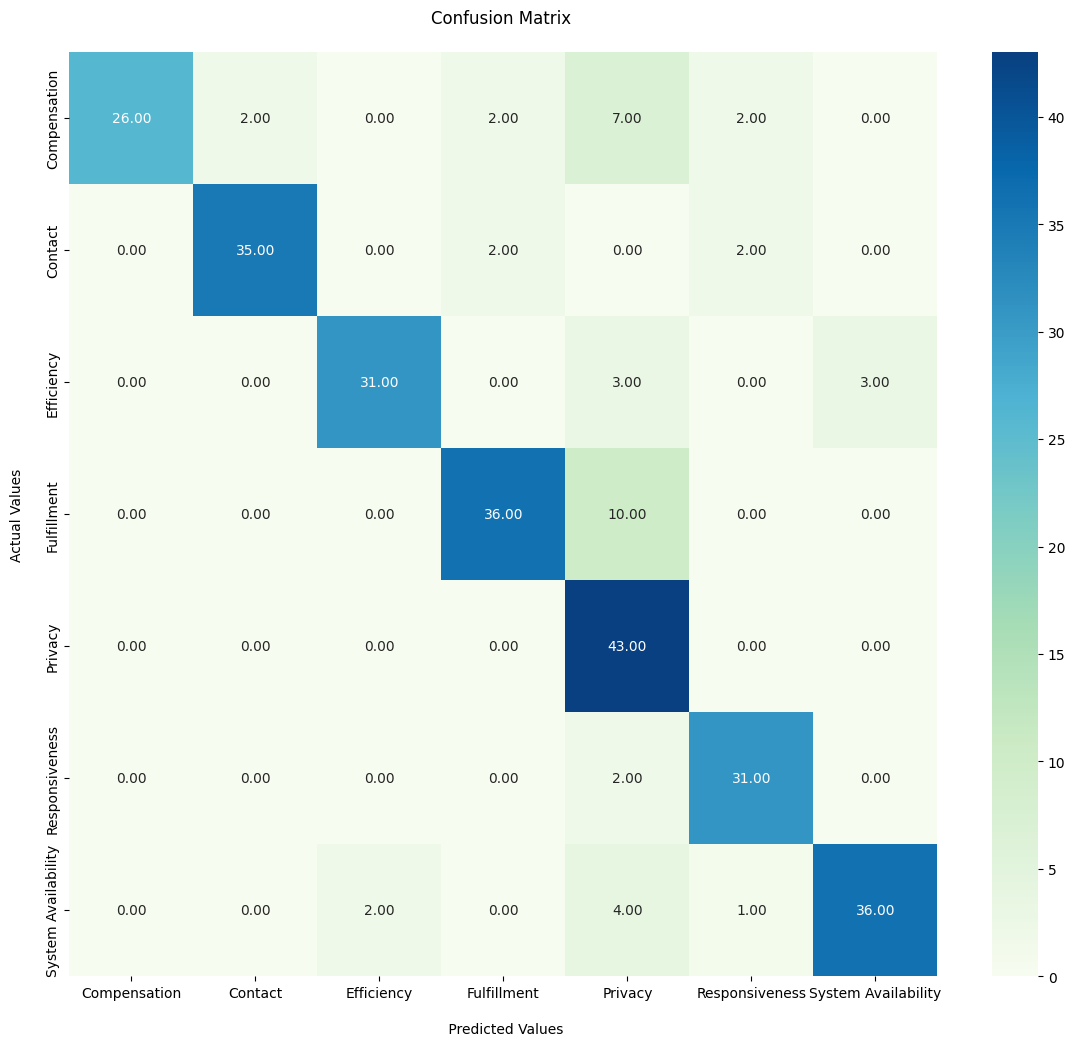

In [ ]:
plt.figure(figsize=(14,12))
fx=sns.heatmap(confusion_matrix(label_uji_aspek, prediksi_aspek), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Compensation','Contact','Efficiency','Fulfillment','Privacy','Responsiveness','System Availability'])
fx.yaxis.set_ticklabels(['Compensation','Contact','Efficiency','Fulfillment','Privacy','Responsiveness','System Availability'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_aspek, prediksi_aspek))

0.85


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8554904096573491


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8846737607607172


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_aspek, prediksi_aspek,average='macro'))

0.8515931913302995


#####Sentiment Classification Binary Term Weighting

In [ ]:
dataShopee = pd.read_csv('UlasanShopeeNew_Lemmatization.csv', sep=',')
dataShopee

In [ ]:
dataShopee = dataShopee.rename(columns = {"jointekslemma": "review"})

In [ ]:
binary_term_weighting = pd.read_csv('binary_term_weighting.csv')
binary_term_weighting

In [ ]:
binary_term_weighting['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(dataShopee["review"]))]

In [ ]:
binary_term_weighting

In [ ]:
sentimen = dataShopee.loc[:,['sentimen']]

In [ ]:
sentimen

,sentimen
0,negatif
1,negatif
2,positif
3,positif
4,negatif
...,...
1395,positif
1396,negatif
1397,negatif
1398,negatif


In [ ]:
binary_term_weighting_sentimen = binary_term_weighting.join(sentimen)

In [ ]:
binary_term_weighting_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,Dokumen,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1,negatif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen2,negatif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen3,positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen4,positif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen5,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1396,positif
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1397,negatif
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1398,negatif
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dokumen1399,negatif


In [ ]:
binary_term_weighting_sentimen['sentimen'] = binary_term_weighting_sentimen['sentimen'].map({'negatif':-1,'positif':1})

In [ ]:
binary_term_weighting_sentimen.drop('Dokumen', axis=1, inplace=True)

In [ ]:
binary_term_weighting_sentimen

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_latih_sentimen,data_uji_sentimen = train_test_split(binary_term_weighting_sentimen, test_size=0.2,random_state=27)

In [ ]:
print(data_uji_sentimen.shape[0])
print(data_latih_sentimen.shape[0])

280
1120


In [ ]:
data_latih_sentimen['sentimen'].value_counts()

 1    562
-1    558
Name: sentimen, dtype: int64

In [ ]:
data_uji_sentimen['sentimen'].value_counts()

-1    144
 1    136
Name: sentimen, dtype: int64

In [ ]:
label_latih_sentimen = data_latih_sentimen.pop('sentimen')

In [ ]:
label_uji_sentimen = data_uji_sentimen.pop('sentimen')

In [ ]:
def hinge_loss_function_sentimen(W_sentimen,X_sentimen,Y_sentimen,regularization_sentimen):
  jarak_sentimen = 1 - (Y_sentimen* np.dot(X_sentimen,W_sentimen))
  dw_sentimen = np.zeros(len(W_sentimen)) ##mengisi semua nilai dengan 0
  if max(0,jarak_sentimen)==0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
    di_sentimen=W_sentimen
  else:
    di_sentimen = W_sentimen - (regularization_sentimen * Y_sentimen*X_sentimen)
  dw_sentimen += di_sentimen
  return dw_sentimen

In [ ]:
from sklearn.utils import shuffle
def sgd_sentimen(data_latih_sentimen, label_latih_sentimen, learning_rate_sentimen = 0.0001, max_epoch_sentimen=10, regularization_sentimen=1000):
  data_latih_sentimen = data_latih_sentimen.to_numpy() ##mengubah data latih menjadi array numpy
  label_latih_sentimen = label_latih_sentimen.to_numpy()
  bobot_sentimen = np.zeros(data_latih_sentimen.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
  for epoch_sentimen in range(1,max_epoch_sentimen+1):
    X_sentimen,Y_sentimen = shuffle(data_latih_sentimen,label_latih_sentimen,random_state=101)
    for index_sentimen,x_sentimen in enumerate(X_sentimen):
      delta_sentimen = hinge_loss_function_sentimen(bobot_sentimen,x_sentimen,Y_sentimen[index_sentimen],regularization_sentimen) #perhitungan nilai gradient cost function
      bobot_sentimen = bobot_sentimen - (learning_rate_sentimen * delta_sentimen)
  return bobot_sentimen

In [ ]:
W_sentimen = sgd_sentimen(data_latih_sentimen, label_latih_sentimen)
print(W_sentimen)

[ 0.         -0.21367453  0.         ...  0.16285896 -0.13434499
  0.        ]


In [ ]:
def testing_sentimen(W_sentimen,data_uji_sentimen):
  prediksi_sentimen = np.array([])
  for i in range(data_uji_sentimen.shape[0]): ##data_uji.shape[0] = memberikan jumlah baris (Gives number of rows)
    y_prediksi_sentimen = np.sign(np.dot(W_sentimen,data_uji_sentimen.to_numpy()[i]))
    if y_prediksi_sentimen == 1 :
      print("positif")
    else :
      print("negatif")
    prediksi_sentimen = np.append(prediksi_sentimen,y_prediksi_sentimen) ##Tambahkan nilai ke akhir array.
  return prediksi_sentimen

In [ ]:
y_prediksi_sentimen = testing_sentimen(W_sentimen, data_uji_sentimen)

negatif
negatif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
positif
negatif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
negatif
negatif
positif
positif
positif
positif
positif
negatif
negatif
negatif
positif
negatif
negatif
negatif
positif
positif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
positif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
negatif
positif
positif
negatif
positif
negatif
positif
negatif
positif
positif
negatif
negatif
negatif
negatif
negatif
positif
negatif
negatif
positif
positif
positif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
negatif
negatif
positif
negatif
positif
positif
positif
positif
negatif
negatif
negatif
negatif
positif
negatif
positif
negatif
positif
negatif
positif
positif
positif
negatif
negatif
negatif
negatif
positif
positif
negatif
positif
positif


In [ ]:
print(y_prediksi_sentimen)

[-1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.
  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_uji_sentimen, y_prediksi_sentimen))

              precision    recall  f1-score   support

          -1       0.90      0.95      0.92       144
           1       0.94      0.88      0.91       136

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [ ]:
from sklearn.metrics import confusion_matrix
matrix_sentimen = confusion_matrix(label_uji_sentimen, y_prediksi_sentimen)

In [ ]:
matrix_sentimen

array([[137,   7],
       [ 16, 120]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

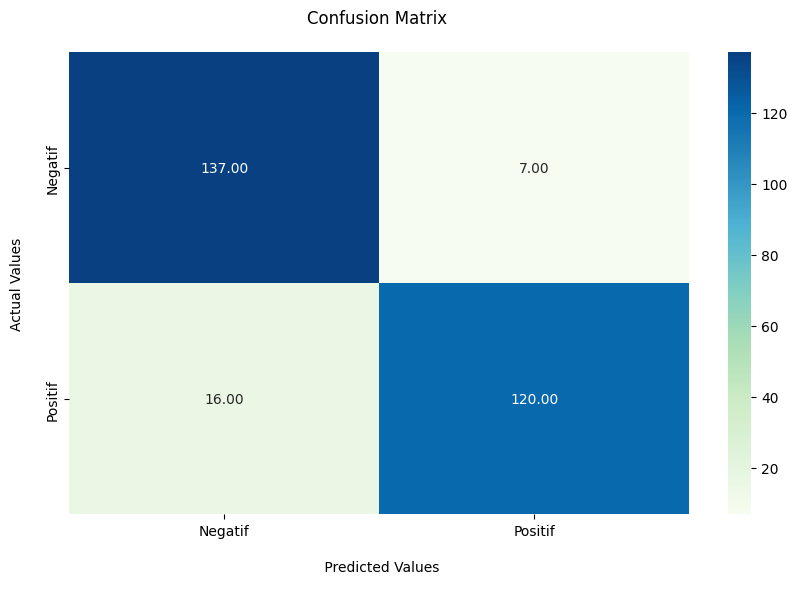

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(label_uji_sentimen, y_prediksi_sentimen), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negatif','Positif'])
fx.yaxis.set_ticklabels(['Negatif','Positif'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(label_uji_sentimen, y_prediksi_sentimen))

0.9178571428571428


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_sentimen, y_prediksi_sentimen))

0.9125475285171102


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_uji_sentimen, y_prediksi_sentimen))

0.9448818897637795


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(label_uji_sentimen, y_prediksi_sentimen))

0.8823529411764706


In [ ]:
log_frequency_weighting = pd.read_csv('log_frequency_weighting_shopee.csv')
log_frequency_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_term_frequency = pd.read_csv('raw_term_frequency.csv')
raw_term_frequency

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
binary_term_weighting = pd.read_csv('binary_term_weighting.csv')
binary_term_weighting

,abad,abai,abal,acara,aceh,ada,adakan,adek,adil,admin,...,was,waswas,wenang,whatsapp,wifi,wilayah,xl,yakin,youtube,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
